

# Fraud Detection
The goal of this case study is to use various classification-based models to detect whether a transaction is a normal payment or a fraud.


## Content

* [1. Problem Definition](#0)
* [2. Load Packages and Dataset](#1)
    * [2.1. Load Packages](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)    
    * [4.2.Feature Selection](#3.2) 
* [5.Evaluate Algorithms and Models](#4) 
    * [5.1. Automated ML](#4.1)
    * [5.3. Train/Test Split](#4.2)
    * [5.3. Evaluate Models](#4.3) 
* [6. Model Tuning](#5)
    * [6.1. Model Tuning-Right Evaluation Metric](#5.1)
    * [6.2. Model Tuning-Balancing the sample](#5.2)
    * [1. Problem Definition](#0)
* [2. Load Packages and Dataset](#1)
    * [2.1. Load Packages](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)    
    * [4.2.Feature Selection](#3.2) 
* [5.Evaluate Algorithms and Models](#4) 
    * [5.1. Automated ML](#4.1)
    * [5.3. Train/Test Split](#4.2)
    * [5.3. Evaluate Models](#4.3) 
* [6. Model Tuning](#5)
    * [6.1. Model Tuning-Right Evaluation Metric](#5.1)
    * [6.2. Model Tuning-Balancing the sample](#5.2)
    * [6.3. SHAP interpretaton](#5.3)



<a id='0'></a>
# 1. Problem Definition

In the classification framework defined for this case study, the response variable takes
a value of 1 in case the given transaction is fraud and 0 otherwise.

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.The task is to get forecast the fraud. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.The features are the result of PCA transformation and aren't intuitive as far as their names are concerned.

The data can be downloaded from: https://www.kaggle.com/mlg-ulb/creditcardfraud


<a id='1'></a>
# 2. Load packages & data

<a id='1.1'></a>
## 2.1. Load packages

In [75]:
# #If required install libraries
# !pip install watermark
# !pip install pycaret
# !pip install shap
# !pip install pandas_profiling

In [102]:
# Load libraries
import numpy as np
import pandas as pd
from pandas import read_csv, set_option
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Auto ML
import pycaret
from pycaret.classification import *

# Interpretation
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import shap
sns.set_theme(style="darkgrid")

In [77]:
# magics
%matplotlib inline
%load_ext autoreload
%load_ext watermark
%autoreload 2
%watermark --iversions

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
seaborn   : 0.11.2
numpy     : 1.21.5
pycaret   : 3.0.0rc2
lightgbm  : 3.3.2
xgboost   : 1.6.1
pandas    : 1.3.5
matplotlib: 3.5.3



In [ ]:
#Disable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1.2'></a>
## 2.2. Loading the Data

We load the data in this step.

#### <font color='red'>Note : Due to limit in the github for the data size, a sample of the data has been loaded in the jupyter notebook repository of this book. However, all the subsequent results in this jupyter notebook is with actual data (144MB) under https://www.kaggle.com/mlg-ulb/creditcardfraud. You should load the full data in case you want to reproduce the results. </font> 

In [78]:
# load dataset
dataset = read_csv('creditcard_sample.csv')
#dataset = read_csv('creditcard.csv') #Load this for the actual data.

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [80]:
# shape
dataset.shape

(99999, 31)

In [6]:
# peek at data
set_option('display.width', 100)
dataset.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# types
set_option('display.max_rows', 500)
dataset.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

As shown in the results above, the entire data type is float, except Class which is integer, and the variable names aren't intuitive.

In [8]:
# describe data
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,42432.982130,-0.262096,-0.032374,0.676251,0.162603,-0.278507,0.094066,-0.108712,0.056009,-0.046529,...,-0.030852,-0.109079,-0.037027,0.008982,0.132193,0.026657,0.000606,0.001730,97.962094,0.002230
std,17044.825093,1.859057,1.656854,1.322888,1.349249,1.356376,1.301356,1.210925,1.207528,1.121255,...,0.718882,0.634301,0.632911,0.595255,0.441065,0.494541,0.393700,0.325159,264.624210,0.047171
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,33471.500000,-1.028101,-0.598711,0.176781,-0.711442,-0.898645,-0.647870,-0.600209,-0.137457,-0.698812,...,-0.224509,-0.531305,-0.176416,-0.323712,-0.131794,-0.325102,-0.062534,-0.005355,7.570000,0.000000
50%,44299.000000,-0.260556,0.078315,0.753991,0.192567,-0.314370,-0.157022,-0.069107,0.074130,-0.119105,...,-0.057669,-0.083855,-0.049239,0.064999,0.170104,-0.070347,0.009832,0.023318,26.310000,0.000000
75%,55851.000000,1.153327,0.735736,1.376333,1.032416,0.249733,0.486356,0.414667,0.360506,0.558226,...,0.119190,0.308337,0.081522,0.406281,0.419906,0.300683,0.083025,0.076568,89.000000,0.000000
max,67374.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,22.614889,10.503090,19.002942,4.014444,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


Let us check the number of fraud vs. non-fraud cases in the data set.

In [9]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(dataset.Class.value_counts().rename(index = class_names))

Not Fraud    99776
Fraud          223
Name: Class, dtype: int64


The dataset is unbalanced with most of the transactions being non-fraud.

<a id='2.2'></a>
## 3.2. Data Visualization

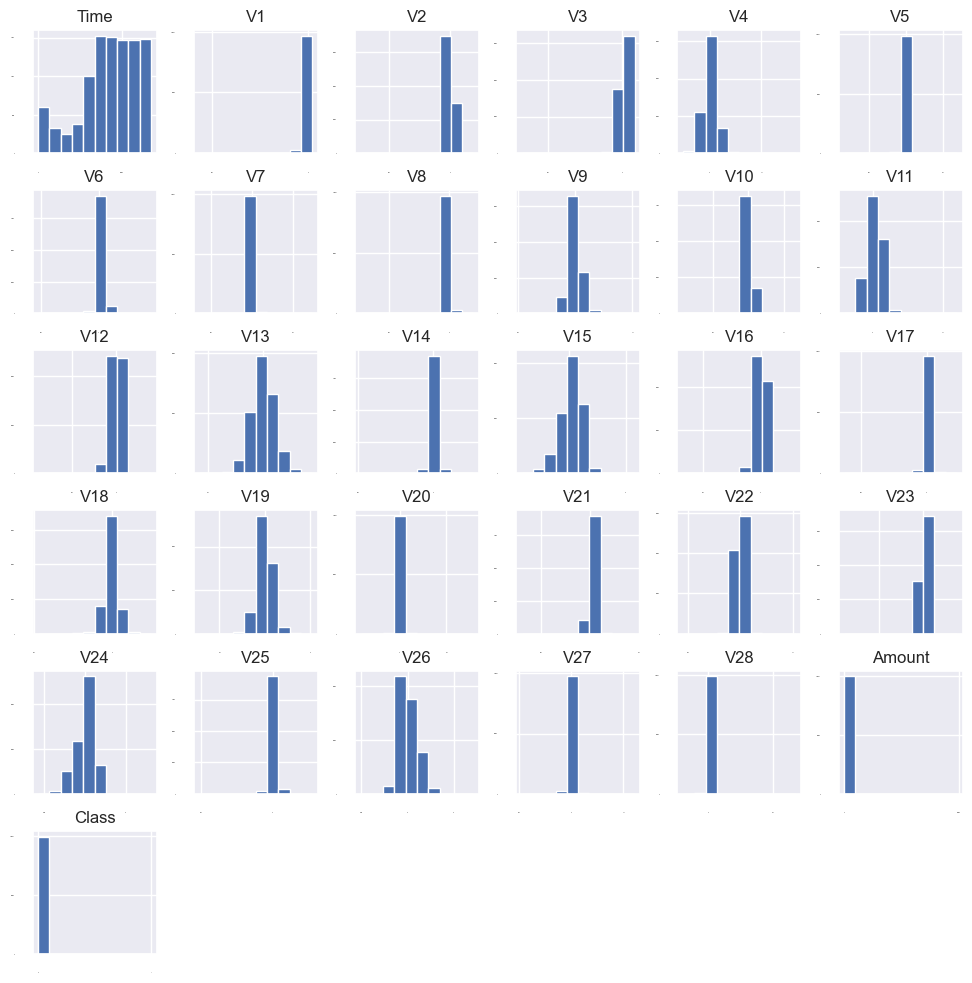

In [26]:
# histograms
dataset.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

Distribution of most of the variables are highly skewed. However, given the variable names aren't known, we don't get much intuition from the plot.

<a id='3'></a>
## 4. Data Preparation

In [12]:
#Checking for any null values and removing the null values'''
print('Null Values =',dataset.isnull().values.any())

Null Values = False


There is no null in the data, and the data is already in the float format, so there is no need to clean or categorise the data

<a id='3.2'></a>
## 4.2. Feature Selection

In [16]:
# find best 10 features
bestfeatures = SelectKBest( k=10)
bestfeatures
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

   Specs         Score
17   V17  20657.815089
14   V14  16227.609484
3     V3  10383.968697
12   V12   9644.179908
10   V10   7909.706201
16   V16   6829.652688
7     V7   6157.563975
11   V11   3567.597482
4     V4   2840.799746
18   V18   2632.036670


Although some of the features are relevant, feature selection is not given significant preference

<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1 Automated ML

#### setup pycaret ML

In [122]:
s = setup(data = dataset, target = 'Class', session_id=123, fold=10, train_size=0.8)

,Description,Value
0,Session id,123
1,Target,Class
2,Target type,Binary
3,Original data shape,"(99999, 31)"
4,Transformed data shape,"(99999, 31)"
5,Transformed train set shape,"(79999, 31)"
6,Transformed test set shape,"(20000, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [82]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9996,0.9854,0.8252,0.9739,0.8921,0.8919,0.8956,2.9820
catboost,CatBoost Classifier,0.9996,0.9866,0.8307,0.9668,0.8918,0.8916,0.8951,5.2470
rf,Random Forest Classifier,0.9995,0.9620,0.8356,0.9379,0.8799,0.8797,0.8831,3.1800
et,Extra Trees Classifier,0.9995,0.9620,0.8248,0.9680,0.8873,0.8871,0.8916,0.5610
ada,Ada Boost Classifier,0.9994,0.9792,0.7967,0.9086,0.8453,0.8449,0.8486,1.8350
dt,Decision Tree Classifier,0.9991,0.9008,0.8020,0.8187,0.8060,0.8056,0.8078,0.3820
lda,Linear Discriminant Analysis,0.9990,0.9902,0.7180,0.8009,0.7549,0.7544,0.7567,0.1350
gbc,Gradient Boosting Classifier,0.9989,0.7981,0.6608,0.8248,0.7118,0.7113,0.7259,8.6780
lr,Logistic Regression,0.9985,0.9399,0.5330,0.7272,0.6135,0.6128,0.6210,1.1250
ridge,Ridge Classifier,0.9984,0.0000,0.4595,0.7212,0.5566,0.5559,0.5724,0.0390


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

Insight
- All tree based models perform well. i.e. rf, et, xgboost, catboost all provide equally high accuracy.
- If we don't want to miss any fraud then recall needs to be maximised.

In [120]:
# reference list of models in pycaret
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


#### Deep dive xgboost

In [84]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9992,0.9631,0.7059,0.9231,0.8000,0.7996,0.8069
1,0.9998,0.9999,0.8889,1.0000,0.9412,0.9411,0.9427
2,0.9996,1.0000,0.8889,0.9412,0.9143,0.9141,0.9145
3,0.9998,0.9952,0.8889,1.0000,0.9412,0.9411,0.9427
4,0.9996,0.9995,0.8333,1.0000,0.9091,0.9089,0.9127
5,0.9996,0.9977,0.8333,1.0000,0.9091,0.9089,0.9127
6,0.9994,0.9383,0.7222,1.0000,0.8387,0.8384,0.8496
7,0.9992,0.9707,0.7778,0.8750,0.8235,0.8232,0.8246
8,0.9998,1.0000,0.8889,1.0000,0.9412,0.9411,0.9427


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [85]:
tuned_xgboost = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9991,0.9741,0.7059,0.8571,0.7742,0.7738,0.7774
1,0.9999,0.9998,0.9444,1.0000,0.9714,0.9714,0.9718
2,0.9998,1.0000,1.0000,0.9000,0.9474,0.9472,0.9486
3,0.9996,0.9851,0.8889,0.9412,0.9143,0.9141,0.9145
4,0.9996,0.9997,0.8889,0.9412,0.9143,0.9141,0.9145
5,0.9996,0.9947,0.8333,1.0000,0.9091,0.9089,0.9127
6,0.9991,0.9731,0.7222,0.8667,0.7879,0.7874,0.7907
7,0.9992,0.9569,0.7778,0.8750,0.8235,0.8232,0.8246
8,0.9999,1.0000,1.0000,0.9474,0.9730,0.9729,0.9733


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [86]:
print(tuned_xgboost)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=123, reg_alpha=0, ...)


#### AUC Plot (on holdout)

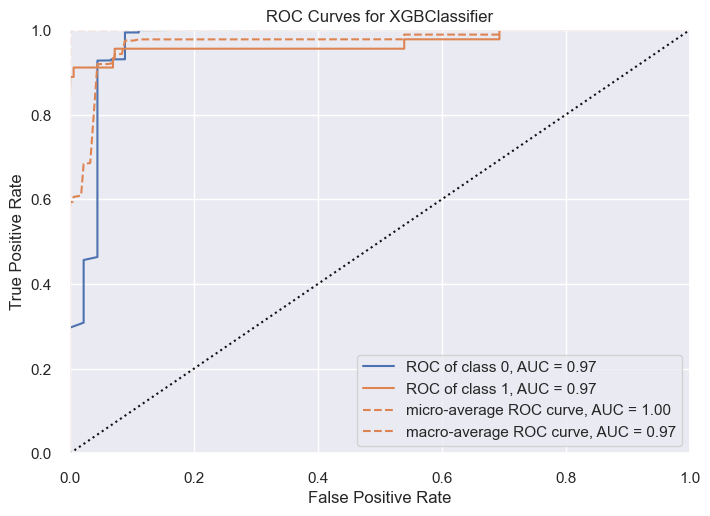

In [87]:
plt.figure(figsize=(10,6))
plot_model(tuned_xgboost, use_train_data=False, plot = 'auc')

#### class prediction error

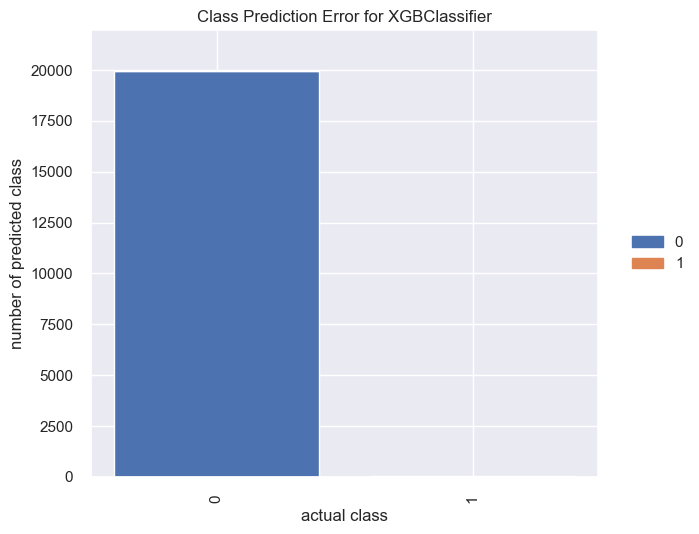

In [88]:
plt.figure(figsize=(10,6))
plot_model(tuned_xgboost, plot = 'error')

#### confusion matrix (on holdout)

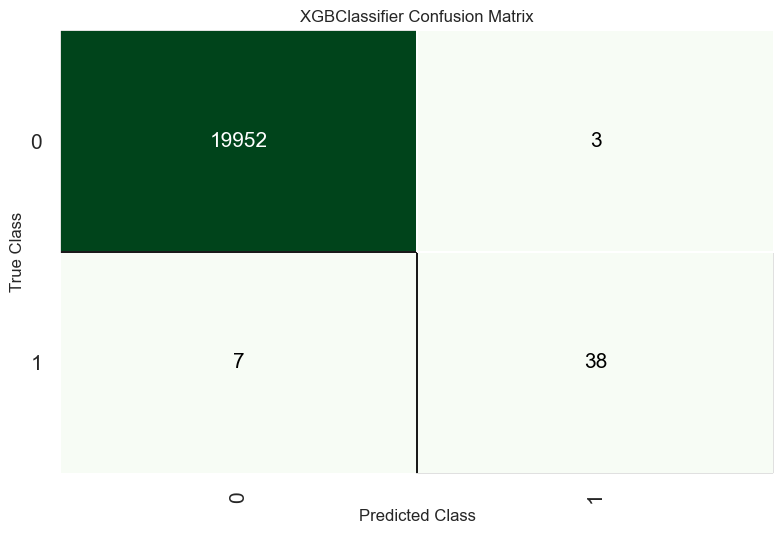

In [89]:
#plt.figure(figsize=(2,1))
plot_model(tuned_xgboost,plot='confusion_matrix')

#### lift curve

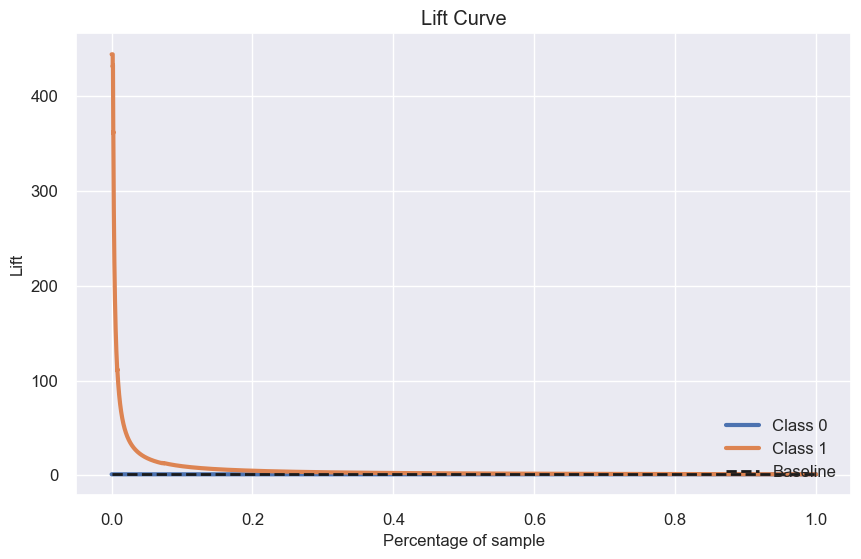

In [90]:
plot_model(tuned_xgboost, plot='lift')

#### cumulative gains curve

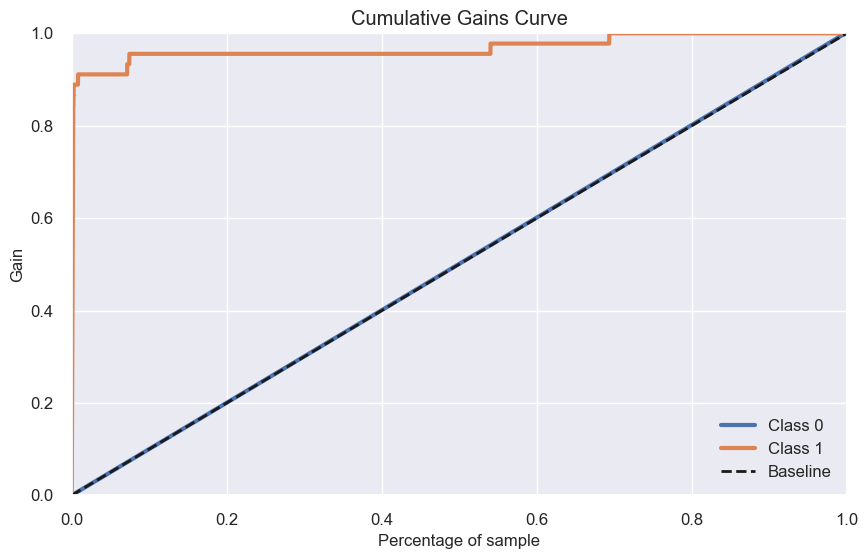

In [91]:
plot_model(tuned_xgboost, plot= 'gain')

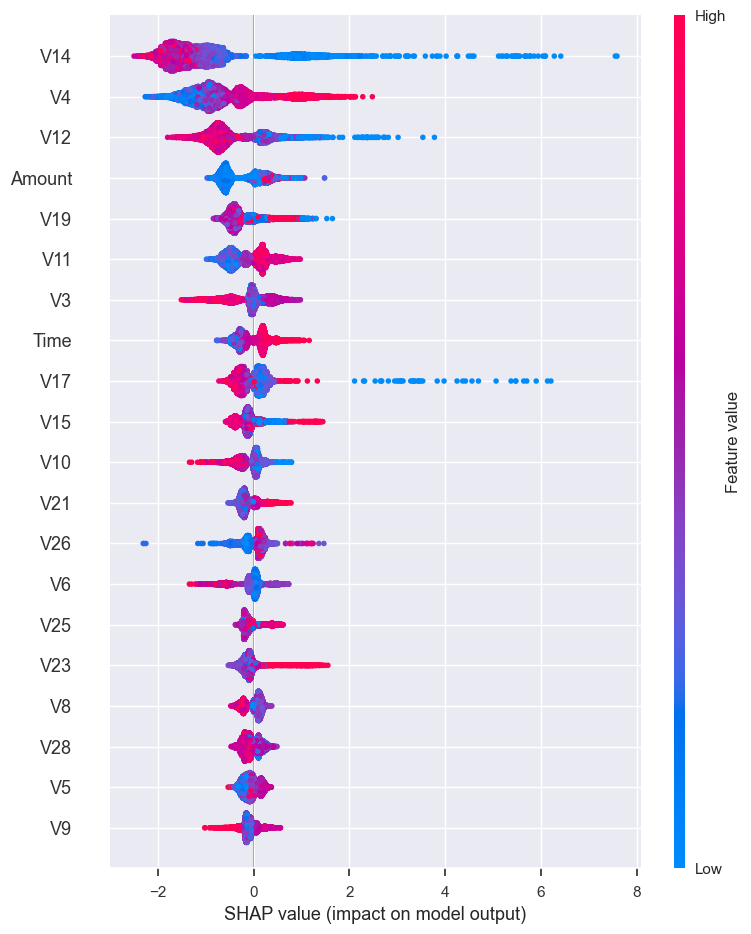

In [92]:
interpret_model(tuned_xgboost, plot= 'summary')

<a id='4.2'></a>
## 5.2. Train Test Split and Evaluation Metrics

In [50]:
# split out validation dataset for the end
Y= dataset["Class"]
X = dataset.loc[:, dataset.columns != 'Class']
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)
scoring = 'accuracy'

<a id='4.3'></a>
## 5.3. Checking Models and Algorithms

In [51]:
# test options for classification
num_folds = 10
seed = 7

In [54]:
# spot check some basic Classification algorithms
#Given Data is huge, some of the slower classification algorithms are commented
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensemble Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier())) # n.b. slow
models.append(('lightgbm', LGBMClassifier()))
models.append(('xgb', XGBClassifier()))
models.append(('catboost', CatBoostClassifier(verbose=False)))
# Bagging methods
models.append(('RF', RandomForestClassifier())) # n.b. slow
models.append(('ET', ExtraTreesClassifier()))

In [55]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.998450 (0.000312)
LDA: 0.999100 (0.000361)
KNN: 0.997925 (0.000363)
CART: 0.999200 (0.000238)
NB: 0.985125 (0.001548)
SVM: 0.997887 (0.000328)
NN: 0.998100 (0.000460)
AB: 0.999400 (0.000295)
lightgbm: 0.994725 (0.004644)
xgb: 0.999612 (0.000189)
catboost: 0.999587 (0.000210)
RF: 0.999537 (0.000262)
ET: 0.999575 (0.000257)


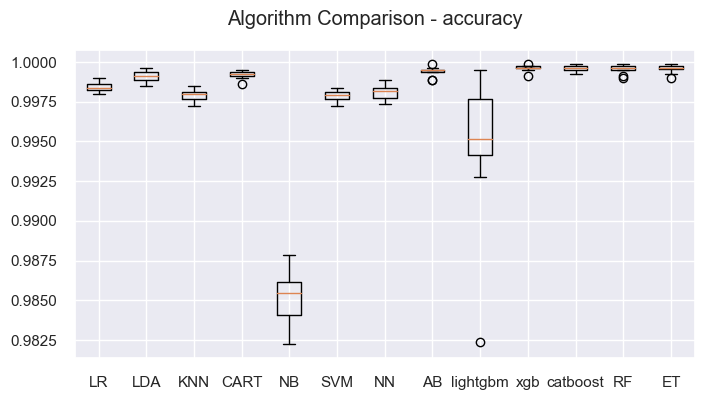

In [56]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - accuracy')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

The accuracy is very high, given that accuracy focusses on the overall no fraud case, but check how well xgboost predicts the fraud case.

In [ ]:
# prepare model
model = XGBClassifier()
model.fit(X_train, Y_train)

In [ ]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

In [ ]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

Although results are good, but still 21 out of 100 frauds aren't caught. So, we should focus on *recall*, which is a metric which minimises false negative. 

<a id='5'></a>
## 6. Model Tuning

<a id='5.1'></a>
## 6.1. Model Tuning by choosing correct evaluation metric
Evaluation Metric recall is selected, which is a metric to minimise false negative.

In [26]:
scoring = 'recall'

In [27]:
# spot check some basic Classification algorithms
# Given Data is huge, some of the slower classification algorithms are commented
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Ensemble Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier())) # n.b. slow
models.append(('lightgbm', LGBMClassifier()))
models.append(('xgb', XGBClassifier()))
models.append(('catboost', CatBoostClassifier(verbose=False)))
# Bagging methods
models.append(('RF', RandomForestClassifier())) # n.b. slow
models.append(('ET', ExtraTreesClassifier()))

In [28]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.519320 (0.114607)
LDA: 0.761890 (0.148240)
KNN: 0.020168 (0.044498)
CART: 0.799800 (0.107398)
NB: 0.840344 (0.093272)
SVM: 0.000000 (0.000000)
NN: 0.566071 (0.308588)
AB: 0.792508 (0.123686)
GBM: 0.651424 (0.226359)
lightgbm: 0.548958 (0.202776)
xgb: 0.843687 (0.087298)
catboost: 0.837678 (0.083165)
RF: 0.822882 (0.086639)
ET: 0.804499 (0.104362)


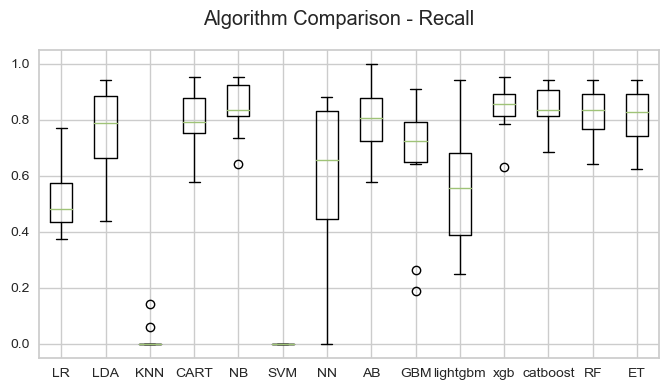

In [29]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - recall')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,4)
pyplot.show()

xgb has the best recall out of all the models, it is used to evaluate the test set

In [57]:
# prepare model
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [58]:
# estimate accuracy on validation set
#rescaledValidationX = scaler.transform(X_validation)
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.99955
[[19946     0]
 [    9    45]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       1.00      0.83      0.91        54

    accuracy                           1.00     20000
   macro avg       1.00      0.92      0.95     20000
weighted avg       1.00      1.00      1.00     20000



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

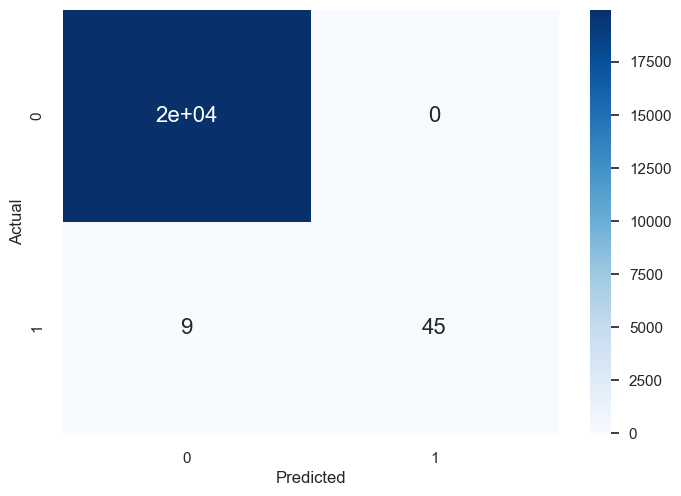

In [59]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

xgb performs much better with only 9 out of cases of fraud not caught. Additionally, false positives are less as well.
However, there are still 9 fraud cases in the test set which aren't caught. This will be further taken care in the following section.

<a id='5.2'></a>
## 6.2. Model Tuning for balancing the sample by Random Under Sampling
In this phase of the project we will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

Steps:
1. The first thing we have to do is determine how imbalanced is our class (use "value_counts()" on the class column to determine the amount for each label)
2. Once we determine how many instances are considered fraud transactions (Fraud = "1") , we should bring the non-fraud transactions to the same amount as fraud transactions (assuming we want a 50/50 ratio), this will be equivalent to 492 cases of fraud and 492 cases of non-fraud transactions.
3. After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to shuffle the data to see if our models can maintain a certain accuracy everytime we run this script.

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)


In [63]:
Y_train.head()

91525    0
19416    0
99078    0
45086    0
54659    0
Name: Class, dtype: int64

In [64]:
df = pd.concat([X_train, Y_train], axis=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
df_new = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
Y_train_new= df_new["Class"]
X_train_new = df_new.loc[:, dataset.columns != 'Class']

dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Distribution of the Classes in the subsample dataset
0    0.744327
1    0.255673
Name: Class, dtype: float64


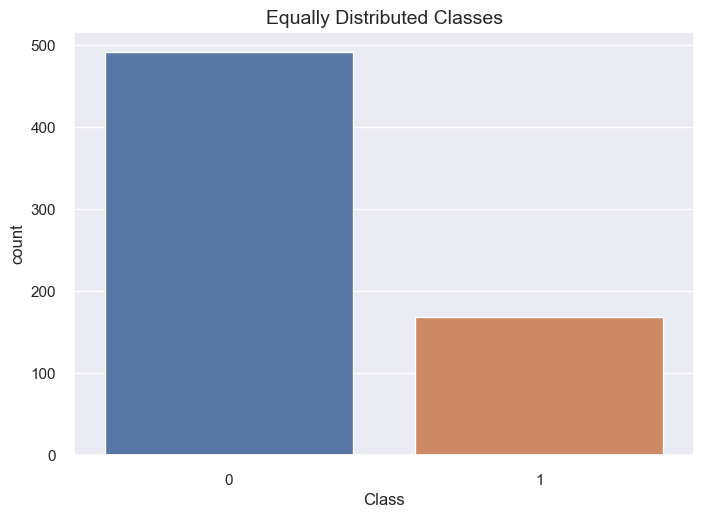

In [65]:
print('Distribution of the Classes in the subsample dataset')
print(df_new['Class'].value_counts()/len(df_new))
sns.countplot('Class', data=df_new)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.
Given the total number of data points are around 900, we try all the Models including Deep Learning Models. 
However, given the data is balanced, the metric used here is accuracy, as it focuses on both false positive and false negative. 

In [66]:
scoring='accuracy'

In [67]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# Neural Network
models.append(('NN', MLPClassifier()))
# Ensemble Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('lightgbm', LGBMClassifier()))
models.append(('xgb', XGBClassifier()))
models.append(('catboost', CatBoostClassifier(verbose=False)))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier(verbose=False)))

In [68]:
#Writing the Deep Learning Classifier in case the Deep Learning Flag is Set to True
#Set the following Flag to 1 if the Deep LEarning Models Flag has to be enabled
EnableDLModelsFlag = 1
if EnableDLModelsFlag == 1 :   
    # Function to create model, required for KerasClassifier
    def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation=activation))
        model.add(Dense(32, activation=activation))
        model.add(Dense(1, activation='sigmoid'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model    
    models.append(('DNN', KerasClassifier(build_fn=create_model, epochs=50, batch_size=10, verbose=0)))

In [69]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train_new, Y_train_new, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.948553 (0.016898)
LDA: 0.941090 (0.033857)
KNN: 0.758005 (0.037228)
CART: 0.931909 (0.039674)
NB: 0.948598 (0.030366)
SVM: 0.744346 (0.037229)
NN: 0.692741 (0.236518)
AB: 0.963682 (0.019418)
GBM: 0.963682 (0.023679)
lightgbm: 0.974310 (0.021420)
xgb: 0.963704 (0.015413)
catboost: 0.965219 (0.020350)
RF: 0.966735 (0.021174)
ET: 0.972795 (0.017601)
3/3 [==============================] - 0s 8ms/step
DNN: 0.775938 (0.211212)


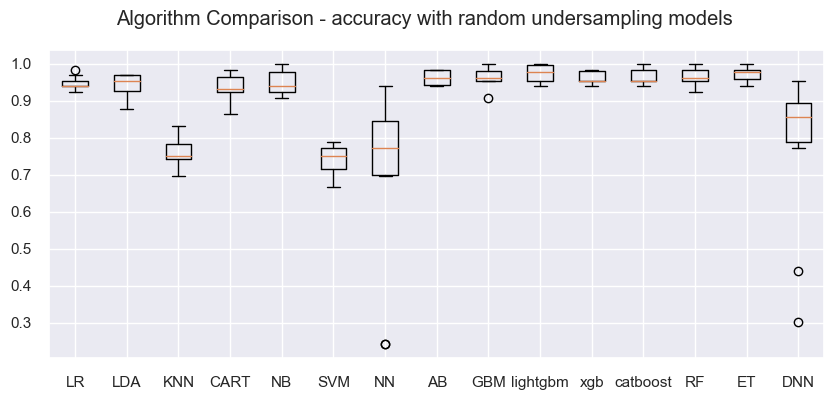

In [93]:
# compare algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - accuracy with random undersampling models')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(10,4)
pyplot.show()

Given that ExtraTreesClassifier is the best model out of all the models, a grid search is performed by varing number of estimators and maximum depth. 

In [94]:
# Grid Search: ExtraTreesClassifier Tuning
'''
n_estimators : int (default=100)
    The number of boosting stages to perform. 
    Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.
max_depth : integer, optional (default=3)
    maximum depth of the individual regression estimators. 
    The maximum depth limits the number of nodes in the tree. 
    Tune this parameter for best performance; the best value depends on the interaction of the input variables.

''' 
n_estimators = [20,180,1000]
max_depth= [2,3,5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth)
model = ExtraTreesClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_new, Y_train_new)

#Print Results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.965242 using {'max_depth': 5, 'n_estimators': 180}
#9 0.895681 (0.041215) with: {'max_depth': 2, 'n_estimators': 20}
#7 0.909294 (0.036240) with: {'max_depth': 2, 'n_estimators': 180}
#8 0.903234 (0.034457) with: {'max_depth': 2, 'n_estimators': 1000}
#6 0.934984 (0.031711) with: {'max_depth': 3, 'n_estimators': 20}
#5 0.947105 (0.025380) with: {'max_depth': 3, 'n_estimators': 180}
#4 0.947128 (0.024327) with: {'max_depth': 3, 'n_estimators': 1000}
#3 0.963727 (0.021541) with: {'max_depth': 5, 'n_estimators': 20}
#1 0.965242 (0.022422) with: {'max_depth': 5, 'n_estimators': 180}
#1 0.965242 (0.022422) with: {'max_depth': 5, 'n_estimators': 1000}


In [95]:
# prepare model
model = ExtraTreesClassifier(max_depth= 5, n_estimators = 180)
model.fit(X_train_new, Y_train_new)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=5, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=180, n_jobs=None, oob_score=False,
                     random_state=None, verbose=0, warm_start=False)

In [96]:
# estimate accuracy on Original validation set
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.99915
[[19936    10]
 [    7    47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19946
           1       0.82      0.87      0.85        54

    accuracy                           1.00     20000
   macro avg       0.91      0.93      0.92     20000
weighted avg       1.00      1.00      1.00     20000



<AxesSubplot: xlabel='Predicted', ylabel='Actual'>

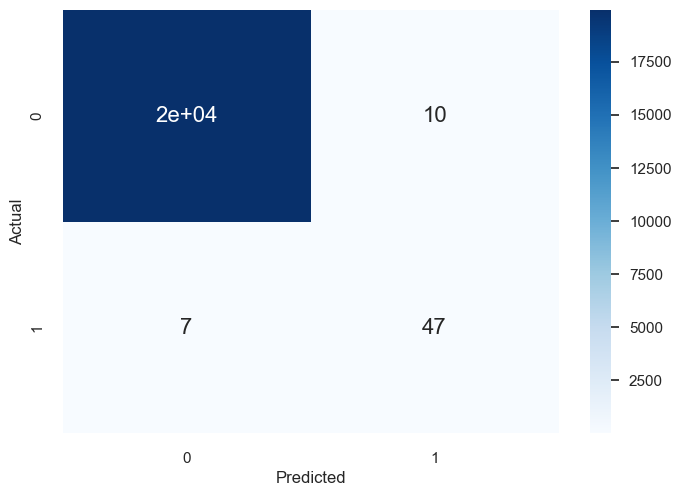

In [97]:
df_cm = pd.DataFrame(confusion_matrix(Y_validation, predictions), columns=np.unique(Y_validation), index = np.unique(Y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

The results on the test set are slightly better - but there are more false positives. 

__Conclusion__:

Choosing the right metric lead to an 
enhancement in the fraud cases detected correctly. Under-sampling lead to a small improvement as all the fraud cases in the test set are correctly identified post under-sampling. 

Under-sampling came with a tradeoff though. In the under-sampled
data our model is unable to detect for a large number of cases non-fraud transactions correctly and instead, misclassifies those non-fraud transactions as fraud cases. 


<a id='5.3'></a>
## 5.3. SHAP Model Explanation


In [134]:
# build a permutation explainer and explain model predictions on a given dataset
shap_values_test = shap.Explainer(model).shap_values(X_validation)

__feature importance__

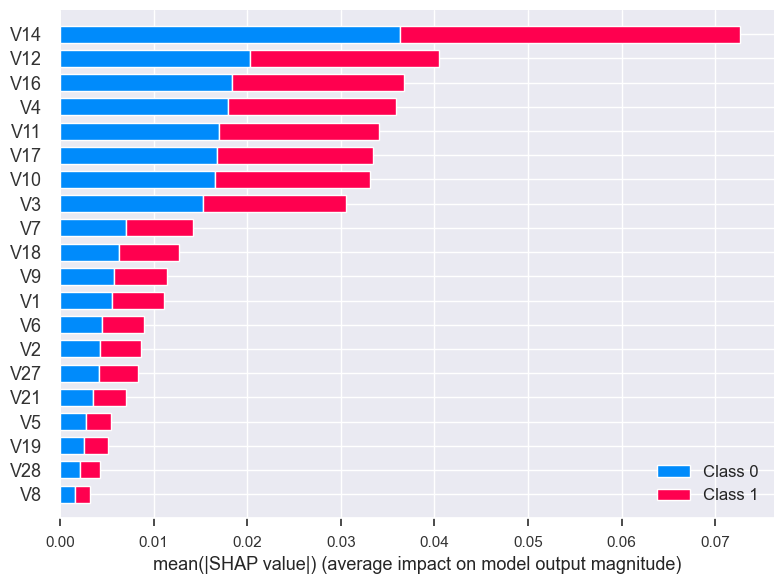

In [137]:
shap.summary_plot(shap_values_test, X_validation,plot_type="bar",plot_size=(8,6))

__beeswarm plot of feature influence on observations__

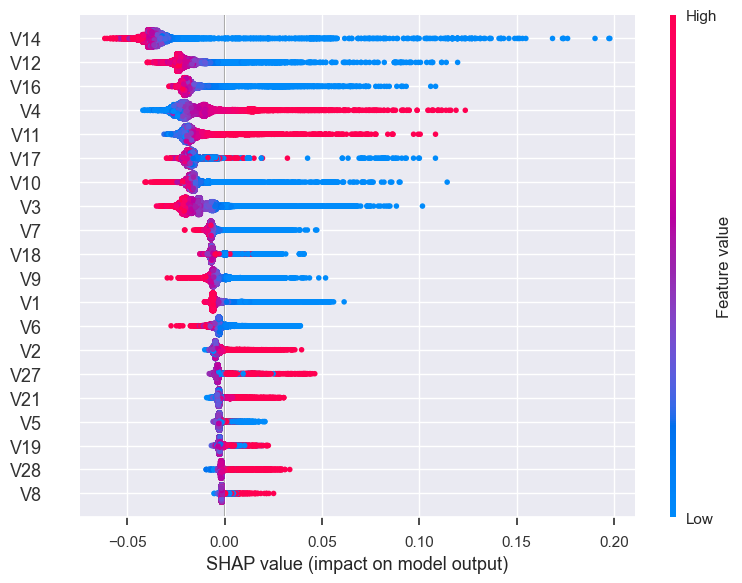

In [131]:
shap.summary_plot(shap_values_test[1], X_validation, plot_type=None,plot_size=(8,6))